![Zip Codes](../images/metro-atlanta-zip-codes-map.jpeg)

# Real Estate Investment Project P2: Preprocessing, Modeling, Evaluation

**Author:** Sierra Stanton
***

### Below we'll replicate the initial steps of our exploration (EDA) notebook to properly load data.

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
# import our chosen packages
import pandas as pd
import numpy as np
import pandas.tseries
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
# import our Zillow dataset
df_z = pd.read_csv('../data/zillow_data.csv')
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [3]:
df_z.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


## Step 2: Filter data for zipcodes specific to Atlanta

In [4]:
# narrow our zip codes down for relevancy

df_atl = df_z.loc[(df_z['Metro'] == 'Atlanta') & (df_z['City'] == 'Atlanta')] # 12 rows, 272 columns
df_atl

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
227,71050,30331,Atlanta,GA,Atlanta,Fulton,228,97100.0,97700.0,98400.0,...,130300,131300,132700,134000,135100,137000,139400,140800,141500,141600
1097,71029,30309,Atlanta,GA,Atlanta,Fulton,1098,260400.0,261700.0,262900.0,...,780200,785900,797400,807600,813500,819200,824900,834500,850300,860700
1223,71043,30324,Atlanta,GA,Atlanta,Fulton,1224,189400.0,190800.0,192300.0,...,506500,509600,515100,519600,523900,528500,532600,537900,543700,545700
1758,71036,30316,Atlanta,GA,Atlanta,Fulton,1759,62300.0,62300.0,62300.0,...,240900,244200,247900,251700,255300,258800,261600,264300,268700,272500
1787,71025,30305,Atlanta,GA,Atlanta,Fulton,1788,297200.0,299000.0,300900.0,...,860000,863400,868200,871200,872400,876800,885600,892900,897600,898200
2757,71028,30308,Atlanta,GA,Atlanta,Fulton,2758,138700.0,139400.0,140100.0,...,524200,529000,539200,547200,557000,570500,581000,585900,594000,599300
3261,71026,30306,Atlanta,GA,Atlanta,Fulton,3262,223100.0,225200.0,227400.0,...,733900,737500,744700,751200,755000,760300,766600,773200,781700,787000
4455,71046,30327,Atlanta,GA,Atlanta,Fulton,4456,515500.0,515900.0,516300.0,...,1135600,1140900,1152100,1158400,1158000,1162000,1173000,1173200,1168400,1165700
4643,71027,30307,Atlanta,GA,Atlanta,Fulton,4644,158900.0,159700.0,160500.0,...,539700,542300,544000,547600,554300,563200,569700,575400,582900,587100
6650,71037,30317,Atlanta,GA,Atlanta,Fulton,6651,51800.0,52500.0,53200.0,...,362500,362500,362300,366000,372400,379200,384900,388400,390400,391600


In [5]:
df_atl

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
227,71050,30331,Atlanta,GA,Atlanta,Fulton,228,97100.0,97700.0,98400.0,...,130300,131300,132700,134000,135100,137000,139400,140800,141500,141600
1097,71029,30309,Atlanta,GA,Atlanta,Fulton,1098,260400.0,261700.0,262900.0,...,780200,785900,797400,807600,813500,819200,824900,834500,850300,860700
1223,71043,30324,Atlanta,GA,Atlanta,Fulton,1224,189400.0,190800.0,192300.0,...,506500,509600,515100,519600,523900,528500,532600,537900,543700,545700
1758,71036,30316,Atlanta,GA,Atlanta,Fulton,1759,62300.0,62300.0,62300.0,...,240900,244200,247900,251700,255300,258800,261600,264300,268700,272500
1787,71025,30305,Atlanta,GA,Atlanta,Fulton,1788,297200.0,299000.0,300900.0,...,860000,863400,868200,871200,872400,876800,885600,892900,897600,898200
2757,71028,30308,Atlanta,GA,Atlanta,Fulton,2758,138700.0,139400.0,140100.0,...,524200,529000,539200,547200,557000,570500,581000,585900,594000,599300
3261,71026,30306,Atlanta,GA,Atlanta,Fulton,3262,223100.0,225200.0,227400.0,...,733900,737500,744700,751200,755000,760300,766600,773200,781700,787000
4455,71046,30327,Atlanta,GA,Atlanta,Fulton,4456,515500.0,515900.0,516300.0,...,1135600,1140900,1152100,1158400,1158000,1162000,1173000,1173200,1168400,1165700
4643,71027,30307,Atlanta,GA,Atlanta,Fulton,4644,158900.0,159700.0,160500.0,...,539700,542300,544000,547600,554300,563200,569700,575400,582900,587100
6650,71037,30317,Atlanta,GA,Atlanta,Fulton,6651,51800.0,52500.0,53200.0,...,362500,362500,362300,366000,372400,379200,384900,388400,390400,391600


# Step 3: Data Preprocessing for Modeling

### Clean Up and Prepare Our Dataset
With this dataframe, we'll take the following actions:
1. Drop irrelevant columns and rename key columns
2. Melt our data by transitioning from wide to long format
3. Reset index as needed
4. Convert the column values for datetimes as a pandas series of datetime objects
5. Separate our data according to ZIP code
6. Narrow down our top ZIP codes

In [6]:
# create functions to prepare our dataframe

# removes our irrelevant columns, renames as needed, reset our index
def condense_df(df):
    df_condensed = df.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis=1)
    df_condensed.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
    df_condensed = df_condensed.reset_index(drop=True)
    return df_condensed

# changes our data from wide to long format for processing
def melt_data(df):
    melted = pd.melt(df, id_vars=['Zipcode'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

# combine the above functions to run in sync, and transform our dataset
def multi_index_df(df):
    df_full = condense_df(df) # condense our df
    df_full_melt = melt_data(df_full) # melt our df
    ts = df_full_melt.set_index('time')
    df_comprehensive = ts.groupby(['Zipcode']).resample('M').sum()
    df_comprehensive = df_comprehensive.drop('Zipcode', axis=1)
    return df_comprehensive

# converts our time index to a DatetimeIndex
def get_datetimes(df):
    return pd.to_datetime(df.index, format='%Y-%m')

In [7]:
# run comprehensive function
df_atl2 = multi_index_df(df_atl)

# preview our dataframe
df_atl2.head()

value
Zipcode time                
30305   1996-04-30  297200.0
        1996-05-31  299000.0
        1996-06-30  300900.0
        1996-07-31  302700.0
        1996-08-31  304500.0

In [8]:
# reset our index
df_atl = df_atl2.reset_index(level=0)

# preview our dataframe
df_atl.head()

,Zipcode,value
time,,
1996-04-30,30305,297200.0
1996-05-31,30305,299000.0
1996-06-30,30305,300900.0
1996-07-31,30305,302700.0
1996-08-31,30305,304500.0


In [9]:
# rename columns for clarity
df_atl.rename(columns={'time': 'Date'}, inplace=True)
df_atl.rename(columns={'value': 'Value'}, inplace=True)
df_atl.head()

,Zipcode,Value
time,,
1996-04-30,30305,297200.0
1996-05-31,30305,299000.0
1996-06-30,30305,300900.0
1996-07-31,30305,302700.0
1996-08-31,30305,304500.0


In [10]:
get_datetimes(df_atl)

DatetimeIndex(['1996-04-30', '1996-05-31', '1996-06-30', '1996-07-31',
               '1996-08-31', '1996-09-30', '1996-10-31', '1996-11-30',
               '1996-12-31', '1997-01-31',
               ...
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
               '2018-03-31', '2018-04-30'],
              dtype='datetime64[ns]', name='time', length=3180, freq=None)

The output above shows that our dataset clearly fulfills the indexing requirements.

### Separate according to Zipcode

We need to ensure that pricing is what's fed into our models, so eventually we need to eliminate our ZIP code column. In order to ensure we don't use the valuable comparisons that will result across ZIP codes, we'll separate our data according to said ZIP.

### Create dictionary for each ZIP with associated home values over time

In [11]:
# create empty dictionary
atl_zips = {}

# create list of unique ZIP codes
ls_unique_zips = list(df_atl.Zipcode.unique())
ls_unique_zips

[30305,
 30306,
 30307,
 30308,
 30309,
 30316,
 30317,
 30324,
 30326,
 30327,
 30331,
 30363]

In [12]:
# loop through to associate home values with each ZIP
for code in ls_unique_zips: 
    zip_split = (df_atl[df_atl['Zipcode']==code]['Value'].copy())
    zip_split.name = code 
    atl_zips[code] = zip_split
    
# preview our results
display(atl_zips.keys())
atl_zips[30305]

dict_keys([30305, 30306, 30307, 30308, 30309, 30316, 30317, 30324, 30326, 30327, 30331, 30363])

time
1996-04-30    297200.0
1996-05-31    299000.0
1996-06-30    300900.0
1996-07-31    302700.0
1996-08-31    304500.0
                ...   
2017-12-31    876800.0
2018-01-31    885600.0
2018-02-28    892900.0
2018-03-31    897600.0
2018-04-30    898200.0
Name: 30305, Length: 265, dtype: float64

In [13]:
# create re-formatted dataframe that displays data across ZIP codes for previewing purposes
zip_split_df = pd.DataFrame(atl_zips)
zip_split_df.head()

,30305,30306,30307,30308,30309,30316,30317,30324,30326,30327,30331,30363
time,,,,,,,,,,,,
1996-04-30,297200.0,223100.0,158900.0,138700.0,260400.0,62300.0,51800.0,189400.0,238100.0,515500.0,97100.0,131400.0
1996-05-31,299000.0,225200.0,159700.0,139400.0,261700.0,62300.0,52500.0,190800.0,240100.0,515900.0,97700.0,131700.0
1996-06-30,300900.0,227400.0,160500.0,140100.0,262900.0,62300.0,53200.0,192300.0,242100.0,516300.0,98400.0,132000.0
1996-07-31,302700.0,229600.0,161300.0,140900.0,264200.0,62300.0,53900.0,193900.0,244000.0,516800.0,99100.0,132300.0
1996-08-31,304500.0,231800.0,162200.0,141700.0,265400.0,62300.0,54500.0,195700.0,245800.0,517500.0,100000.0,132800.0


In [14]:
zip_split_df[30305]

time
1996-04-30    297200.0
1996-05-31    299000.0
1996-06-30    300900.0
1996-07-31    302700.0
1996-08-31    304500.0
                ...   
2017-12-31    876800.0
2018-01-31    885600.0
2018-02-28    892900.0
2018-03-31    897600.0
2018-04-30    898200.0
Name: 30305, Length: 265, dtype: float64

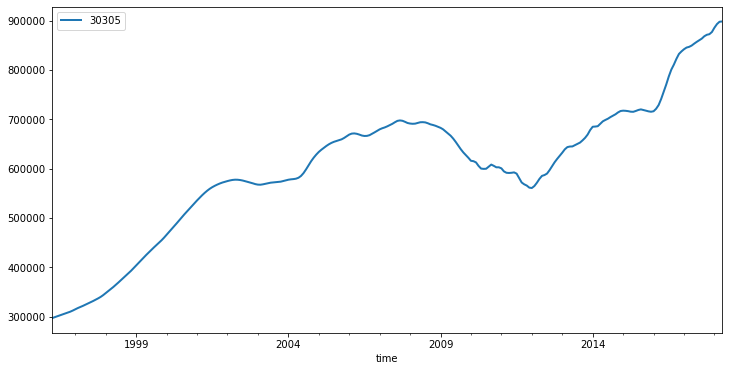

In [15]:
# preview one ZIPs value change across time
ts = zip_split_df[30305].copy()
ax= ts.plot(figsize=(12,6), linewidth=2, fontsize=10)
ax.legend()
plt.show()

## Narrowing down Target Zip Codes

Because the key factor in our analysis for Hellbnent Investments is ROI, we'll determine which ZIP codes rank highest in ROI across a recent five-year span and narrow down the ZIP codes we'll forecast.

In [16]:
firstzip_roi = (atl_zips[30305]['2017-12-31'] - atl_zips[30305]['2012-12-31']) / atl_zips[30305]['2012-12-31']
secondzip_roi = (atl_zips[30306]['2017-12-31'] - atl_zips[30306]['2012-12-31']) / atl_zips[30306]['2012-12-31']
thirdzip_roi = (atl_zips[30307]['2017-12-31'] - atl_zips[30307]['2012-12-31']) / atl_zips[30307]['2012-12-31']
fourthzip_roi = (atl_zips[30308]['2017-12-31'] - atl_zips[30308]['2012-12-31']) / atl_zips[30308]['2012-12-31']
fifthzip_roi = (atl_zips[30309]['2017-12-31'] - atl_zips[30309]['2012-12-31']) / atl_zips[30309]['2012-12-31']
sixthzip_roi = (atl_zips[30316]['2017-12-31'] - atl_zips[30316]['2012-12-31']) / atl_zips[30316]['2012-12-31']
seventhzip_roi = (atl_zips[30317]['2017-12-31'] - atl_zips[30317]['2012-12-31']) / atl_zips[30317]['2012-12-31']
eighthzip_roi = (atl_zips[30324]['2017-12-31'] - atl_zips[30324]['2012-12-31']) / atl_zips[30324]['2012-12-31']
ninthzip_roi = (atl_zips[30326]['2017-12-31'] - atl_zips[30326]['2012-12-31']) / atl_zips[30326]['2012-12-31']
tenthzip_roi = (atl_zips[30327]['2017-12-31'] - atl_zips[30327]['2012-12-31']) / atl_zips[30327]['2012-12-31']
eleventhzip_roi = (atl_zips[30331]['2017-12-31'] - atl_zips[30331]['2012-12-31']) / atl_zips[30331]['2012-12-31']
twelvezip_roi = (atl_zips[30363]['2017-12-31'] - atl_zips[30363]['2012-12-31']) / atl_zips[30363]['2012-12-31']

In [17]:
print(firstzip_roi)
print(secondzip_roi)
print(thirdzip_roi)
print(fourthzip_roi)
print(fifthzip_roi)
print(sixthzip_roi)
print(seventhzip_roi)
print(eighthzip_roi)
print(ninthzip_roi)
print(tenthzip_roi)
print(eleventhzip_roi)
twelvezip_roi

0.4010866091403004
0.4884494909945184
0.5914100028256569
0.8338154934104789
0.508100147275405
1.5397448478900884
1.2788461538461537
0.5044121833191005
0.3960078856579596
0.4233219010289074
0.8664850136239782


0.7090184354758345

In [18]:
top_zips = [30316, 30317, 30331, 30308, 30363]

In [19]:
# create dataframes for top ZIP codes
zip_1 = top_zips[0]
df_30316 = atl_zips[zip_1]

zip_2 = top_zips[1]
df_30317 = atl_zips[zip_2]

zip_3 = top_zips[2]
df_30331 = atl_zips[zip_3]

zip_4 = top_zips[3]
df_30308 = atl_zips[zip_4]

zip_5 = top_zips[4]
df_30363 = atl_zips[zip_5]

In [20]:
df_30316.tail()

time
2017-12-31    258800.0
2018-01-31    261600.0
2018-02-28    264300.0
2018-03-31    268700.0
2018-04-30    272500.0
Name: 30316, dtype: float64

# Step 4: Stationarity

### Evaluate and Address Stationarity
With this dataframe, we'll take the following actions:
1. Check stationarity across our comprehensive home value data
2. Check stationarity according to the ZIP code in question
3. Use several stationarity methods across all our data sets to see which transformation is most effective
4. Create stationary variables to hold the most stationary versions of our data

## 1. Stationarity Check: Comprehensive Data

Lucky for us, the corresponding home values we have for each ZIP code has already gone through a degree of this to date. The metric for our home values is the following:

**Zillow Home Value Index (ZHVI)**: A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range.

However, we need to not only check this but enforce further stationarity as needed. This step is crucial because the models we're using for time series expect stationarity. Without it, our models would be much less accurate at predictions. Let's run the data across ZIP codes through a stationarity check to see which next steps are most fitting.

In [21]:
# create a comprhensive dataframe to hold the mean across ZIPs
comp_average = df_atl.groupby('time')['Value'].mean()
comp_average.head()

time
1996-04-30    196991.666667
1996-05-31    198000.000000
1996-06-30    199033.333333
1996-07-31    200083.333333
1996-08-31    201183.333333
Name: Value, dtype: float64

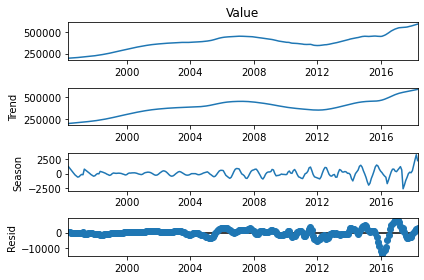

In [22]:
# preview what we're working with
stl = STL(comp_average)
res = stl.fit()
fig = res.plot()

### Run a Dickey-Fuller test to check for stationarity

In [23]:
# create function that gives accurate picture of current stationarity

def test_stationarity(timeseries):
    roll_mean = timeseries.rolling(window=8).mean() # 8 year span
    roll_std = timeseries.rolling(window=8).std()
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

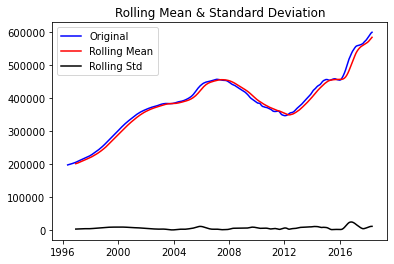

Results of Dickey-Fuller Test:
Test Statistic                  -1.483123
p-value                          0.541843
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [24]:
# test the original stationarity across our ZIP code data

test_stationarity(comp_average)

While the Test Statistic is smaller than our p-value, we can clearly see an upward trend and seasonality. The numbers show that our data needs to be more stationarity in order to generate more accurate forecasts.

## 2. Stationarity Checks: By ZIP Code

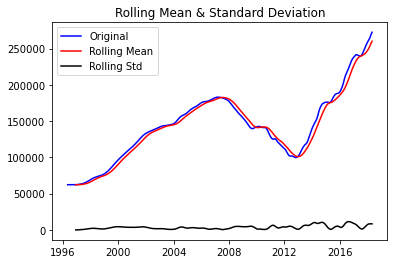

Results of Dickey-Fuller Test:
Test Statistic                  -0.723845
p-value                          0.840476
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


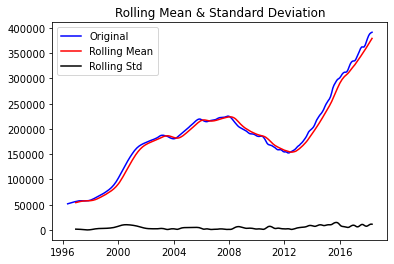

Results of Dickey-Fuller Test:
Test Statistic                  -0.620278
p-value                          0.866334
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


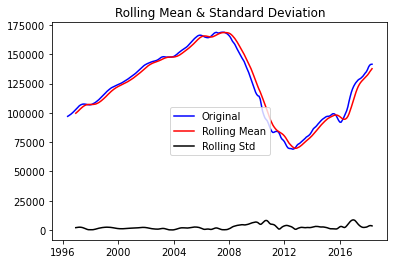

Results of Dickey-Fuller Test:
Test Statistic                  -2.947775
p-value                          0.040068
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


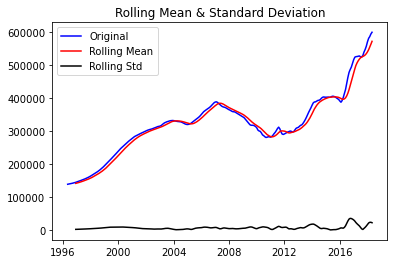

Results of Dickey-Fuller Test:
Test Statistic                  -0.755417
p-value                          0.831869
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


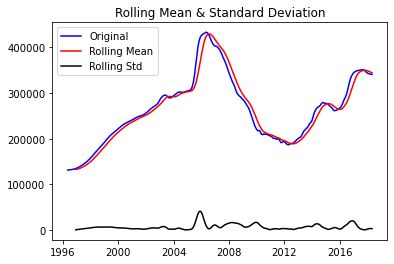

Results of Dickey-Fuller Test:
Test Statistic                  -2.413827
p-value                          0.137872
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [25]:
for df in [df_30316, df_30317, df_30331, df_30308, df_30363]:
    test_stationarity(df)

Taking a look at our Test Static and p-value across tests show they each need to be addressed with appropriate methods in order to better achieve stationarity.

## 3. Making our data stationary

### Stationarity Method: Differencing

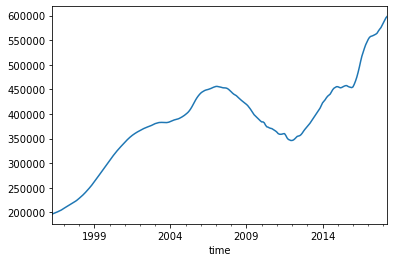

In [26]:
# plot our default data across ZIPs
comp_average.plot();

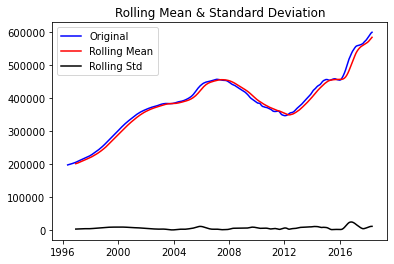

Results of Dickey-Fuller Test:
Test Statistic                  -1.483123
p-value                          0.541843
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [27]:
# test the original stationarity across our ZIP code data

test_stationarity(comp_average)

While the Test Statistic is smaller than our p-value, we can clearly see an upward trend and seasonality. The numbers show that our data needs to be more stationarity in order to generate more accurate forecasts.

In [28]:
# preview our default data across ZIPs
comp_average.head(11)

time
1996-04-30    196991.666667
1996-05-31    198000.000000
1996-06-30    199033.333333
1996-07-31    200083.333333
1996-08-31    201183.333333
1996-09-30    202350.000000
1996-10-31    203600.000000
1996-11-30    204916.666667
1996-12-31    206483.333333
1997-01-31    208241.666667
1997-02-28    209941.666667
Name: Value, dtype: float64

In [29]:
# get and preview our differenced values
diff = comp_average.diff()
diff.head(11)

time
1996-04-30            NaN
1996-05-31    1008.333333
1996-06-30    1033.333333
1996-07-31    1050.000000
1996-08-31    1100.000000
1996-09-30    1166.666667
1996-10-31    1250.000000
1996-11-30    1316.666667
1996-12-31    1566.666667
1997-01-31    1758.333333
1997-02-28    1700.000000
Name: Value, dtype: float64

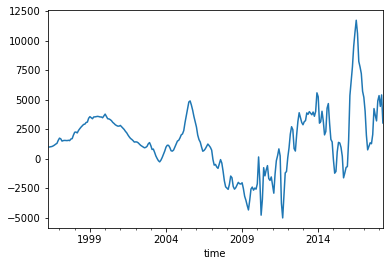

In [30]:
# plot our differenced data across ZIPs
diff.plot();

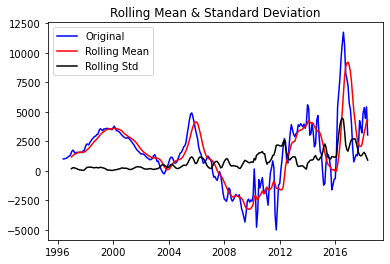

Results of Dickey-Fuller Test:
Test Statistic                  -2.085055
p-value                          0.250566
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [31]:
# test differenced data to see how stationarity has changed
test_stationarity(comp_average.diff().dropna())

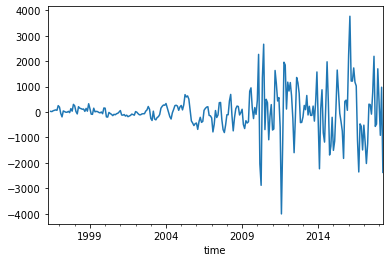

In [32]:
# try a second order of differencing our data
comp_average.diff().diff().plot();

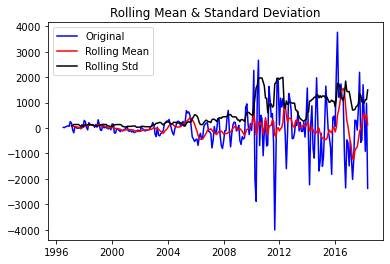

Results of Dickey-Fuller Test:
Test Statistic                  -5.036810
p-value                          0.000019
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [33]:
# test second order differenced data to see how stationarity has changed
test_stationarity(comp_average.diff().diff().dropna())

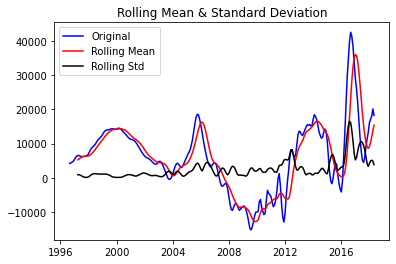

Results of Dickey-Fuller Test:
Test Statistic                  -2.373603
p-value                          0.149326
#Lags Used                      15.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


In [34]:
test_stationarity(comp_average.diff(4).dropna())

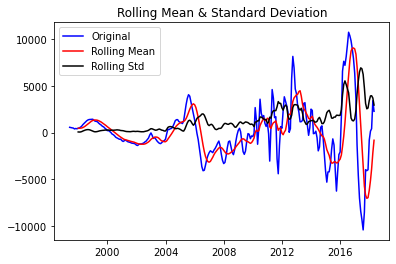

Results of Dickey-Fuller Test:
Test Statistic                  -3.381040
p-value                          0.011622
#Lags Used                      15.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [35]:
test_stationarity(comp_average.diff(12).diff().dropna())

From our series of tests above on the comprehensive data, we can see that doing a second order of differencing resulted in the most stationary results. Our Dickey-Fuller Test gave us a resulting Test Statistic of -5.036810 and p-value of 0.000019. It's worth noting this is a rejection of the null hypothesis.

We didn't get better results changing our period numbers within `.diff` to date.

### Differencing Across ZIPs

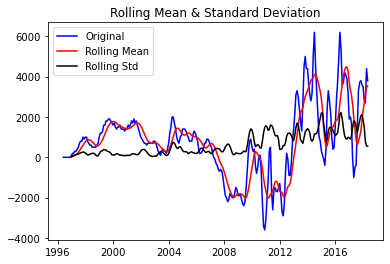

Results of Dickey-Fuller Test:
Test Statistic                  -2.382927
p-value                          0.146613
#Lags Used                       4.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


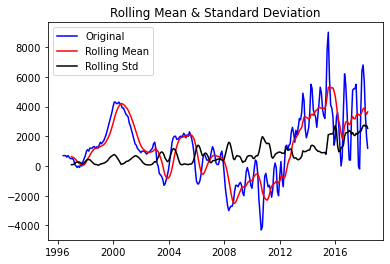

Results of Dickey-Fuller Test:
Test Statistic                  -2.085558
p-value                          0.250361
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


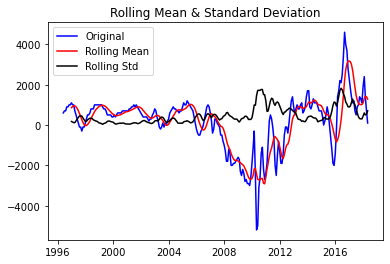

Results of Dickey-Fuller Test:
Test Statistic                  -2.040910
p-value                          0.268928
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


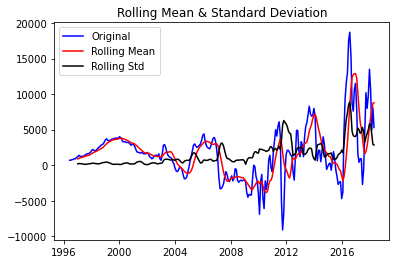

Results of Dickey-Fuller Test:
Test Statistic                  -2.232763
p-value                          0.194570
#Lags Used                      12.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


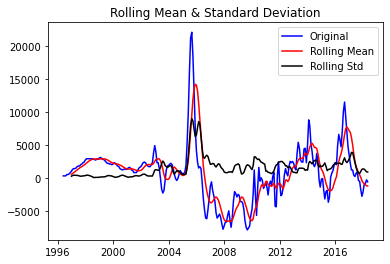

Results of Dickey-Fuller Test:
Test Statistic                  -2.650105
p-value                          0.083077
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [36]:
# One order - let's see if the same stationarity methods work across ZIPs
for df in [df_30316, df_30317, df_30331, df_30308, df_30363]:
    test_stationarity(df.diff().dropna())

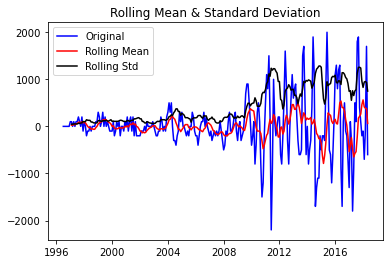

Results of Dickey-Fuller Test:
Test Statistic                -1.108287e+01
p-value                        4.267808e-20
#Lags Used                     3.000000e+00
Number of Observations Used    2.590000e+02
Critical Value (1%)           -3.455853e+00
Critical Value (5%)           -2.872765e+00
Critical Value (10%)          -2.572752e+00
dtype: float64


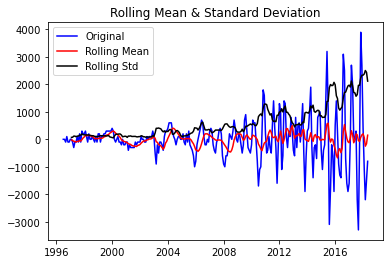

Results of Dickey-Fuller Test:
Test Statistic                  -4.201338
p-value                          0.000655
#Lags Used                      16.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


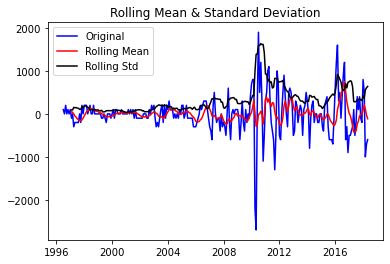

Results of Dickey-Fuller Test:
Test Statistic                  -4.283994
p-value                          0.000473
#Lags Used                      15.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


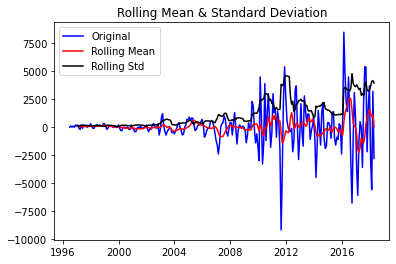

Results of Dickey-Fuller Test:
Test Statistic                -8.329475e+00
p-value                        3.399190e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64


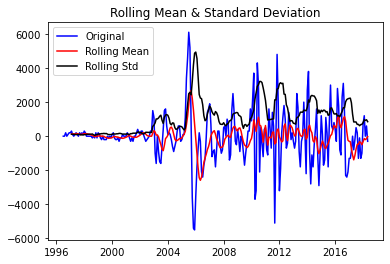

Results of Dickey-Fuller Test:
Test Statistic                  -5.350817
p-value                          0.000004
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [37]:
# Second order - let's see if the same stationarity methods work across ZIPS
for df in [df_30316, df_30317, df_30331, df_30308, df_30363]:
    test_stationarity(df.diff().diff().dropna())

Most of the ZIP codes improved, with the exception of our first, ZIP code `30316`. Let's change the parameter within our first order of differencing to see its effect. 

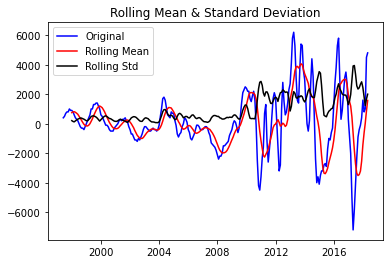

Results of Dickey-Fuller Test:
Test Statistic                  -3.963182
p-value                          0.001616
#Lags Used                      15.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [38]:
test_stationarity(df_30316.diff(12).diff().dropna())

We've now seen all of our ZIP codes have significant improvements in stationarity through differencing. The trend carried over from our comprehensive data and treating each separately gave us verification and even more pull.

## 4. Define our stationary variables

With the range of variables we're using, let's save the best variation as a new variable to hold our transformation.

In [39]:
# create variable to hold the most stationary version to date

stationary_homevalues = comp_average.diff().diff().dropna()

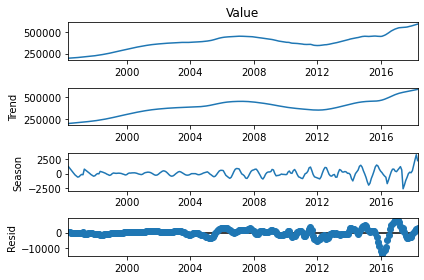

In [40]:
# our original stationarity
stl = STL(comp_average)
res = stl.fit()
fig = res.plot()

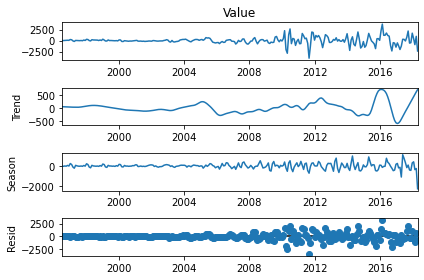

In [41]:
# our developed stationarity
stl = STL(stationary_homevalues)
res = stl.fit()
fig = res.plot()

### Bringing in our ZIPs

### PLEASE NOTE:
We are unable to use the particularly best method for our unique `30316` ZIP code during our modeling later, which developed further with a 12 parameter within two orders of differencing. We have however seen that a second order of differencing worked across the board and was typically the best method we found to get stationarity to date. I will still create holding variables and train/test variables (further down) for every ZIP in case we are able to develop our findings further.

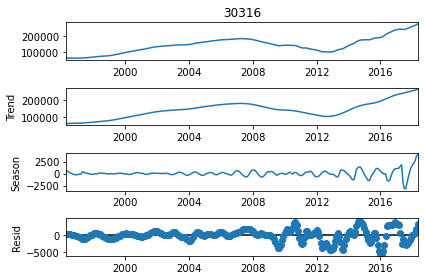

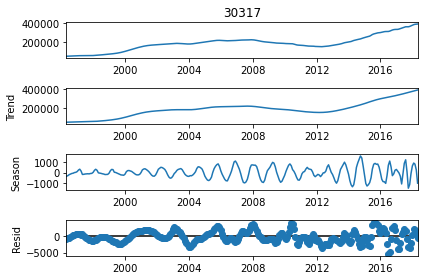

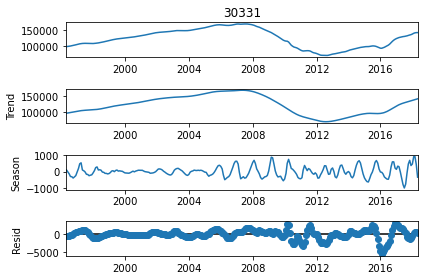

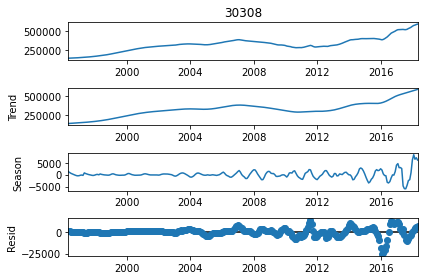

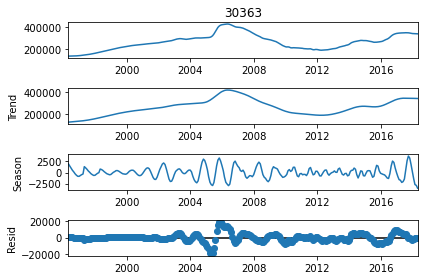

In [42]:
# our original stationarity across ZIPs
for df in [df_30316, df_30317, df_30331, df_30308, df_30363]:
    stl = STL(df)
    res = stl.fit()
    fig = res.plot()

In [43]:
# define our stationary versions
st_df_30317 = df_30317.diff().diff().dropna()
st_df_30331 = df_30331.diff().diff().dropna()
st_df_30308 = df_30308.diff().diff().dropna()
st_df_30363 = df_30363.diff().diff().dropna()

st_df_30316 = df_30316.diff(12).diff().dropna()

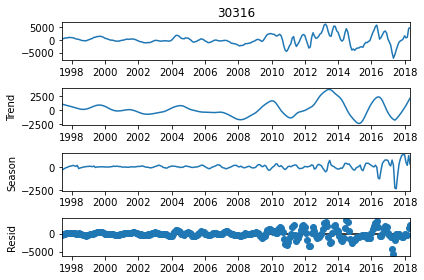

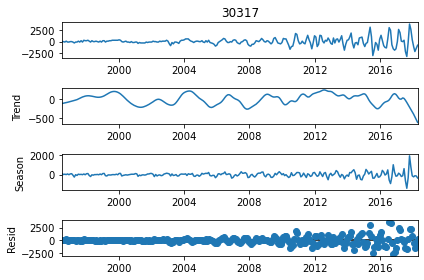

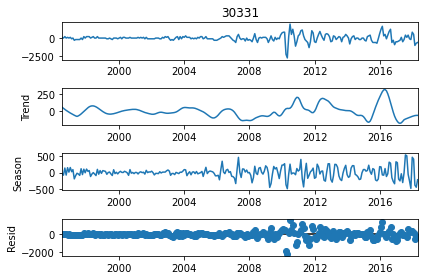

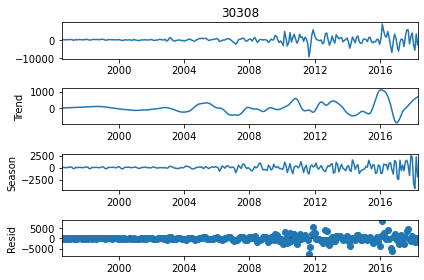

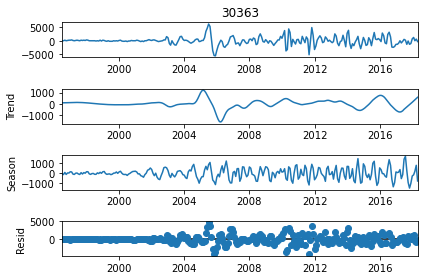

In [44]:
# our developed stationarity across ZIPs
for df in [st_df_30316, st_df_30317, st_df_30331, st_df_30308, st_df_30363]:
    stl = STL(df)
    res = stl.fit()
    fig = res.plot()

Lets note the work that's been done across the upward trend, seasonality, and our residual data. There's still much room for development here. Let's try one more method to see if we can take this further.

### Stationarity Method: Logging Values

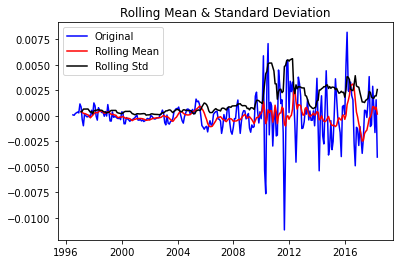

Results of Dickey-Fuller Test:
Test Statistic                  -5.007112
p-value                          0.000021
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [45]:
ts_log_atlzips = np.log(comp_average).diff().diff().dropna()
test_stationarity(ts_log_atlzips)

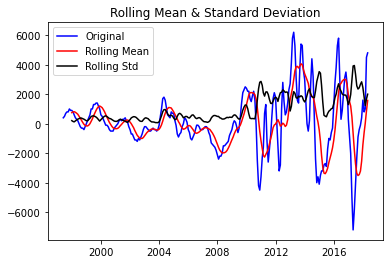

Results of Dickey-Fuller Test:
Test Statistic                  -3.963182
p-value                          0.001616
#Lags Used                      15.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [46]:
log_30316 = df_30316.diff(12).diff().dropna()
test_stationarity(log_30316)

#log_30317 = df_30317.diff().diff().dropna()
#test_stationarity(log_30317)

#log_30331 = df_30331.diff().diff().dropna()
#test_stationarity(log_30331)

#log_30308 = df_30308.diff().diff().dropna()
#test_stationarity(log_30308)

#log_30363 = df_30363.diff().diff().dropna()
#test_stationarity(log_30363)

We can see a **very** slight variation in our results but essentially logging values didn't improve the stationary of our data. Let's move to the next step.

# Step 5: Train Test Split

### Ensure our data is properly split for modeling
With this dataframe, we'll take the following actions:
1. Train-Test split across our comprehensive home value data
2. Train-Test split according to the ZIP code in question (in case of future use)

## 1. Train-Test split across our comprehensive home value data

**CITATION**: this code was developed with guidance from the Flatiron School. Please find the accompanying file within __[this folder](https://github.com/learn-co-students/011121-pt-ds/tree/main/phase_4)__.

In [47]:
# split into train, test, and holdout, holdout only used with final model

split = int(len(comp_average) * .9)
full_train, holdout = stationary_homevalues.iloc[:split], stationary_homevalues.iloc[split:]

second_split = int(len(full_train) * .9)
train, test = full_train[:second_split], full_train[second_split:]

We've effectively split our data by splitting at 90% to get our holdout validation data that will be used only with our final model. We've also created our train and test splits using a split with the remaining 90% of `full_train` data. We'll use that train-test split to see how well our learned predictions do and help us determine the best model.

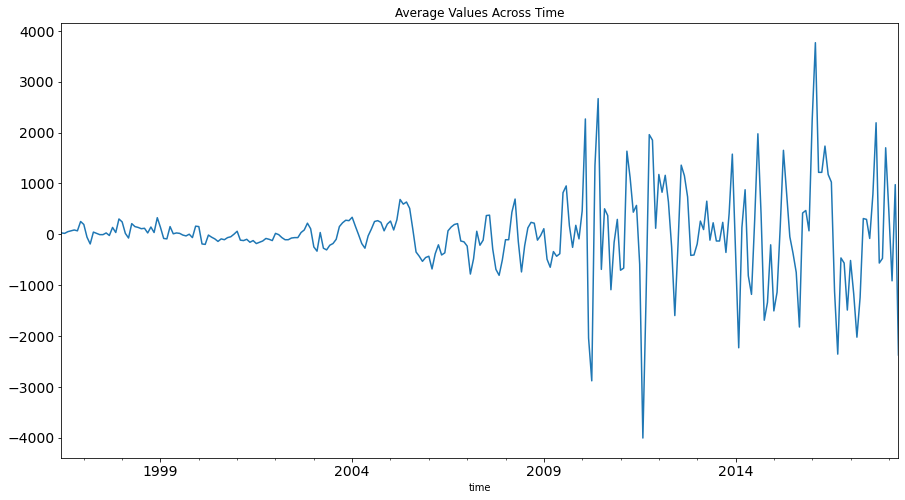

In [48]:
# visualize our train-test-holdout split
stationary_homevalues.plot(figsize=(15,8),title='Average Values Across Time', fontsize=14);

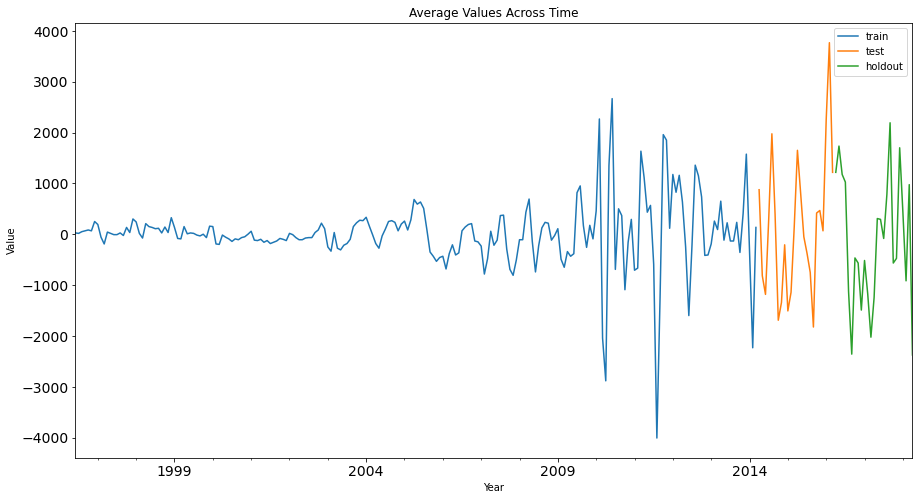

In [49]:
# visualize our train-test split
train.plot(figsize=(15,8), title='Average Values Across Time', fontsize=14, label='train')
test.plot(figsize=(15,8), title='Average Values Across Time', fontsize=14, label='test')
holdout.plot(figsize=(15,8), title='Average Values Across Time', fontsize=14, label='holdout')
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc='best')
plt.show();

## 2. Train-Test split according to the ZIP code in question (in case of future use)

In [50]:
top_zips

[30316, 30317, 30331, 30308, 30363]

In [51]:
# split into train, test, and holdout, holdout only used with final model

split = int(len(df_30316) * .9)
full_train, holdout_30316 = st_df_30316.iloc[:split], st_df_30316.iloc[split:]

second_split = int(len(full_train) * .9)
train_30316, test_30316 = full_train[:second_split], full_train[second_split:]

In [52]:
# split into train, test, and holdout, holdout only used with final model

split = int(len(df_30317) * .9)
full_train, holdout_30317 = st_df_30317.iloc[:split], st_df_30317.iloc[split:]

second_split = int(len(full_train) * .9)
train_30317, test_30317 = full_train[:second_split], full_train[second_split:]

In [53]:
# split into train, test, and holdout, holdout only used with final model

split = int(len(df_30331) * .9)
full_train, holdout_30331 = st_df_30331.iloc[:split], st_df_30331.iloc[split:]

second_split = int(len(full_train) * .9)
train_30331, test_30331 = full_train[:second_split], full_train[second_split:]

In [54]:
# split into train, test, and holdout, holdout only used with final model

split = int(len(df_30308) * .9)
full_train, holdout_30308 = st_df_30308.iloc[:split], st_df_30308.iloc[split:]

second_split = int(len(full_train) * .9)
train_30308, test_30308 = full_train[:second_split], full_train[second_split:]

In [55]:
# split into train, test, and holdout, holdout only used with final model

split = int(len(df_30363) * .9)
full_train, holdout_30363 = st_df_30363.iloc[:split], st_df_30363.iloc[split:]

second_split = int(len(full_train) * .9)
train_30363, test_30363 = full_train[:second_split], full_train[second_split:]

# Step 6: ACF & PCF
1. ACF Testing across comprehensive data
2. ACF Testing across ZIP codes
3. PCF Testing across comprehensive data
4. PCF Testing across ZIP codes

## 1/2. ACF

### Let's get a better understanding of which lags work best for our data

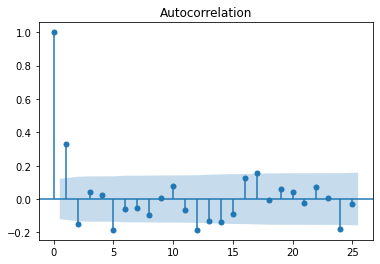

In [56]:
# plot autocorellation for each lag using stationary data
plot_acf(stationary_homevalues, alpha=.05)
plt.show()

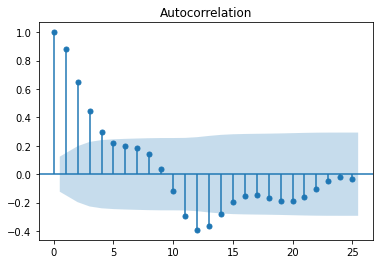

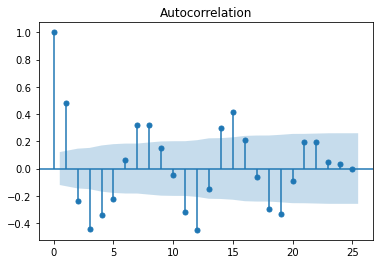

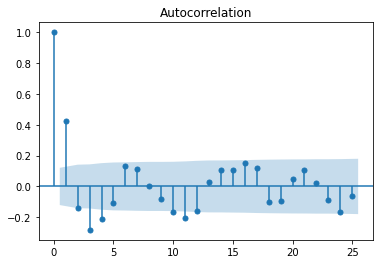

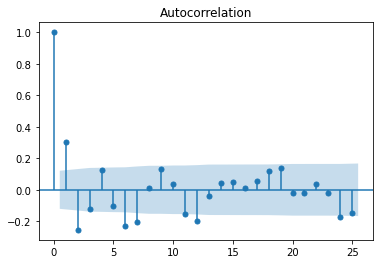

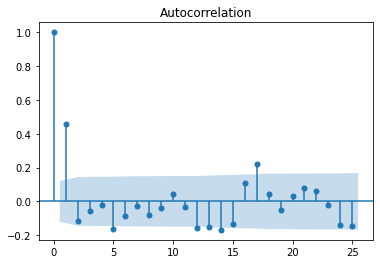

In [57]:
for df in [st_df_30316, st_df_30317, st_df_30331, st_df_30308, st_df_30363]:
    plot_acf(df, alpha=.05)
    plt.show()

## 3/4. PACF

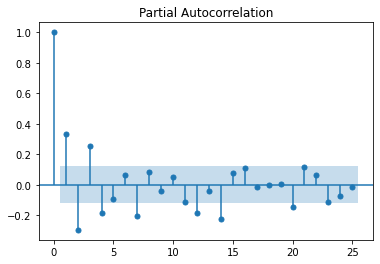

In [58]:
# plot pacf
plot_pacf(stationary_homevalues, alpha=.05)
plt.show()

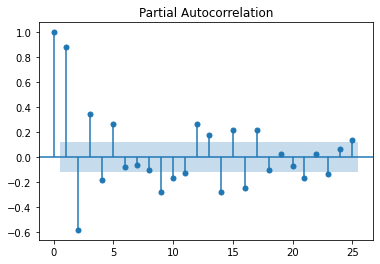

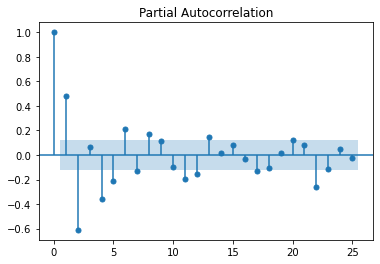

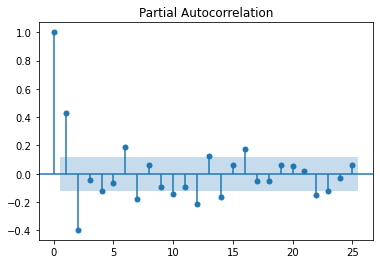

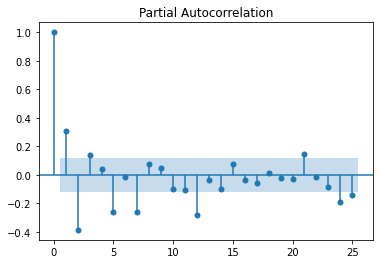

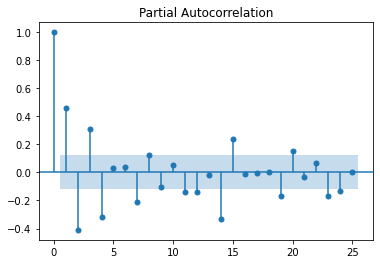

In [59]:
for df in [st_df_30316, st_df_30317, st_df_30331, st_df_30308, st_df_30363]:
    plot_pacf(df, alpha=.05)
    plt.show()

While we can certainly manipulate our data further with more time, the graphs above let us know that there is varied statistical significance across the board for our stationary data.

We can see statistically significant correlations up to 2 across our PACFs and often reaching 3-4.

We can later use this info to influence how we model our data later. 

# Step 7: SARIMA Modeling
1. Alter our train-test data according to this project's capacity
2. Determine and Set ARIMA Parameters
3. Run our best performing model across train-test data and observe results
4. Forecast using our best resulting model across ZIP

After researching the nature of real-estate, accounting for a smoothing process on Zillow's end (that aids our efforts to an extent), and several conversations amongst the team - we've decided to model our data using the SARIMA method.

SARIMA, or SARIMAX, which stands for Seasonal AutoRegressive Integrated Moving Averages with eXogenous regressors, can be used with a non-stationary series with inherent dependence among values, and seasonality.

More info on SARIMAX: https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

### Train-Test Modeling: A Redefinition

As noted earlier, while we prepared our data both comprehensively and by ZIP code, we determined that a second order of differencing worked across the board and was typically the best method we found to get stationarity to date. We still creating holding variables and train/test on a per ZIP code basis in case we are able to develop our findings further. One extra step we'll take here is trimming our data so as not to include the 08' housing crisis (which as evidenced in our prior notebook) had an effect across our ZIP code data. We'll trim the data we're using to forecast here - and this can be altered later if needed according to our purposes.

In [60]:
# remove housing data prior to 2010
stationary_homevalues = stationary_homevalues.loc[stationary_homevalues.index >= '2010-04']
stationary_homevalues.head()

time
2010-04-30   -2883.333333
2010-05-31    1350.000000
2010-06-30    2666.666667
2010-07-31    -691.666667
2010-08-31     500.000000
Name: Value, dtype: float64

**CITATION**: this code was developed with guidance from the Flatiron School. Please find the accompanying file __[here](https://github.com/learn-co-students/011121-pt-ds/tree/main/phase_4)__.

In [61]:
# split into train, test, and holdout, holdout only used with final model

split = int(len(comp_average) * .9)
full_train, holdout = stationary_homevalues.iloc[:split], stationary_homevalues.iloc[split:]

second_split = int(len(full_train) * .9)
train, test = full_train[:second_split], full_train[second_split:]

In [62]:
top_zips

[30316, 30317, 30331, 30308, 30363]

In [63]:
atl_zips.keys()

dict_keys([30305, 30306, 30307, 30308, 30309, 30316, 30317, 30324, 30326, 30327, 30331, 30363])

In [64]:
# make train data into a dictionary according to ZIP
train_dict = {}
for name in top_zips:
    temp_train = atl_zips[name].loc['2010-04-30':'2017-06-30']
    train_dict[name] = temp_train

In [65]:
# make test data into a dictionary according to ZIP
test_dict = {}
for name in ls_unique_zips:
    temp_test = atl_zips[name].loc['2017-07-31':'2018-04-30']
    test_dict[name] = temp_test

**CITATION**: __[This article](https://github.com/learn-co-students/011121-pt-ds/tree/main/phase_4)__ was used for guidance in dealing with this dictionary.

In [66]:
for key in [30305, 30306, 30307, 30309, 30324, 30326, 30327]:
    del atl_zips[key]

In [67]:
atl_zips.keys()

dict_keys([30308, 30316, 30317, 30331, 30363])

### Setting our ARIMA Parameters

1. p = auto-regressive, let's us incorporate the effect of past values, simply lags of a dependent variable
2. d = integrated, deals with the amount of differencing as it identifies the # of lag values to subtract from current observation
3. q = moving-average, used to set the error of the model as a linear combination of the error values observed at previous time points in the past

Together, these three parameters account for seasonality, trend, and noise in datasets.

AIC, also known as Akaike Information Criterion, is a comparable metric that estimates the relative quality of statistical models. We'll do our best to gauge which model parameters will perform the best by comparing the resulting AIC's within the particular ZIP code.

**CITATION**: the code within this section was developed with assistance from the Flatiron School curriculum. Please find the accompanying file here: https://github.com/learn-co-curriculum/dsc-sarima-models-lab/tree/solution

In [68]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p,d,q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### Please Note:
This is our most computationally expensive cell below - however it automates several tasks at once and only takes about **three minutes** per our testing.

In [69]:
param_dict = {}   

for name in top_zips:
    import warnings
    warnings.filterwarnings('ignore')
    ans = []

    for para1 in pdq:
        for para2 in pdqs:
            try:
                mod = sm.tsa.SARIMAX(train_dict[name],
                                order = para1,
                                seasonal_order = para2,
                                enforce_stationarity = False,
                                enforce_invertibility = False)
                output = mod.fit()
                ans.append([name, para1, para2, output.aic])
            except:
                continue
    param_dict[name] = pd.DataFrame(ans, columns = ['name','pdq','pdqs','AIC'])

In [70]:
param_dict[30317]

,name,pdq,pdqs,AIC
0,30317,"(0, 0, 0)","(0, 0, 0, 12)",2373.490303
1,30317,"(0, 0, 0)","(0, 0, 1, 12)",2014.879430
2,30317,"(0, 0, 0)","(0, 1, 0, 12)",1765.963214
3,30317,"(0, 0, 0)","(0, 1, 1, 12)",1478.113470
4,30317,"(0, 0, 0)","(1, 0, 0, 12)",1717.803553
...,...,...,...,...
59,30317,"(1, 1, 1)","(0, 1, 1, 12)",1044.235257
60,30317,"(1, 1, 1)","(1, 0, 0, 12)",1215.802196
61,30317,"(1, 1, 1)","(1, 0, 1, 12)",1191.618234
62,30317,"(1, 1, 1)","(1, 1, 0, 12)",1066.895323


Now that we can compare model performance based on our parameters, we'll run our ZIP codes within the optimal model that had the lowest AIC value.

### Let's run our lowest AIC results model on our training set

SARIMA Model Result for 30316


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.8791,0.081,10.900,0.000,0.721,1.037
ma.L1,0.6570,0.127,5.193,0.000,0.409,0.905
ma.S.L12,-0.1760,0.092,-1.912,0.056,-0.356,0.004
sigma2,1.061e+06,2.75e+05,3.860,0.000,5.22e+05,1.6e+06


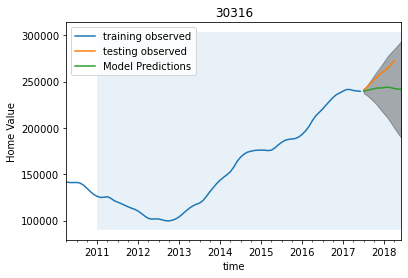

SARIMA Model Result for 30317


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.6589,0.088,7.507,0.000,0.487,0.831
ma.L1,0.7034,0.116,6.059,0.000,0.476,0.931
ma.S.L12,-0.1319,0.065,-2.015,0.044,-0.260,-0.004
sigma2,1.828e+06,3.65e+05,5.003,0.000,1.11e+06,2.54e+06


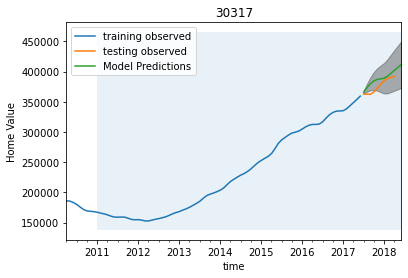

SARIMA Model Result for 30331


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.9362,0.043,21.816,0.000,0.852,1.020
ma.L1,0.2245,0.042,5.325,0.000,0.142,0.307
ar.S.L12,-0.5653,0.118,-4.790,0.000,-0.797,-0.334
ma.S.L12,0.0068,0.068,0.099,0.921,-0.127,0.141
sigma2,3.021e+05,4.66e+04,6.481,0.000,2.11e+05,3.94e+05


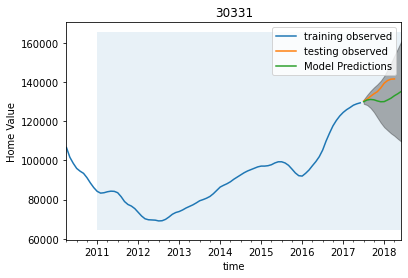

SARIMA Model Result for 30308


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.8369,0.075,11.137,0.000,0.690,0.984
ma.L1,0.7669,0.043,17.766,0.000,0.682,0.852
ma.S.L12,-19.6362,11.643,-1.686,0.092,-42.457,3.184
sigma2,2.315e+04,2.68e+04,0.865,0.387,-2.93e+04,7.56e+04


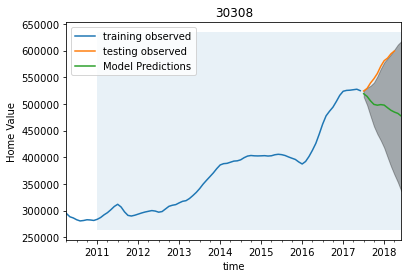

SARIMA Model Result for 30363


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.8252,0.099,8.332,0.000,0.631,1.019
ma.L1,0.6825,0.114,5.992,0.000,0.459,0.906
ma.S.L12,-0.1129,0.045,-2.506,0.012,-0.201,-0.025
sigma2,3.056e+06,5.02e+05,6.084,0.000,2.07e+06,4.04e+06


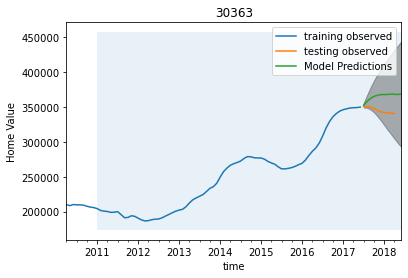

In [71]:
# running best parameters on training set for each zip code into model

summary_table = pd.DataFrame() # makes dataframe for mse/rmse of each zip code
Zipcode = [] # creates lists of each zip code, mse and rmse score for summary
MSE_Value = []
RMSE_Value = []
# makes a dictionary for confidence levels of each zip code
confidences = {}
# makes a dictionary for the forecast plots of each zip code
figures = {}
# makes a dictionary for each zip code's model
models = {}
# iterate through each unique zip code
for name in top_zips:
    # temporary df holding the parameters for current zip code loop is on
    temp_orders = param_dict[name]
    # locates the lowest AIC score for that zip code to use in model
    best_para = temp_orders.loc[temp_orders['AIC'].idxmin()]


    ARIMA_MODEL = sm.tsa.SARIMAX(train_dict[name],
                                 order = best_para['pdq'],
                                 seasonal_order = best_para['pdqs'],
                                 enforce_stationarity = False,
                                 enforce_invertibility = False,
                                 )
    
    output = ARIMA_MODEL.fit()
    print('SARIMA Model Result for {}'.format(name))
    # print the summary report
    display(output.summary().tables[1])
    # plot the diagnostics
    #output.plot_diagnostics(figsize=(15, 18))
    #plt.show()
    # puts model output for each zip code into dictionary
    models[name] = output
    output = models[name]
    # function to get the current figure from the loop
    fig = plt.gcf()
    # puts plot for each zip code into dictionary
    figures[name] = fig
    
    # getting predications for 1 year to compare with test data
    prediction = output.get_forecast(steps=12, 
                                     dynamic=False, full_results = True)
    pred_conf = prediction.conf_int()
    # puts confidence intervals for each zip code into dictionary
    confidences[name] = pred_conf
    zip_forecasted = prediction.predicted_mean
    zip_truth = test_dict[name]
    

    # calculating rmse and mse values
    rmse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
    mse = ((zip_forecasted - zip_truth)**2).mean()
    
    Zipcode.append(name)
    RMSE_Value.append(rmse)
    MSE_Value.append(mse)
        
    # plotting predictions and confidence intervals for all zip codes
    ax = train_dict[name].plot(label='training observed')
    test_dict[name].plot(label='testing observed', ax=ax)


    prediction.predicted_mean.plot(label='Model Predictions', ax=ax)
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=0.3)

    
    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2011-01-01'), # date train data starts
                     prediction.predicted_mean.index[-1], alpha=.1, zorder=-1)

    ax.set_ylabel('Home Value')
    ax.set_title(str(name))
   
    plt.legend()
    plt.show()

In [72]:
# makes columns from the zipcode, mse, rmse lists
summary_table['Zipcode'] = Zipcode 
summary_table['MSE'] = MSE_Value
summary_table['RMSE'] = RMSE_Value
summary_table

,Zipcode,MSE,RMSE
0,30316,2.818001e+08,16786.902870
1,30317,1.247347e+08,11168.470822
2,30331,4.387427e+07,6623.765454
3,30308,5.239945e+09,72387.461470
4,30363,4.437297e+08,21064.891854


## Forecasting using our best resulting model across ZIP

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.8972,0.022,41.528,0.000,0.855,0.940
ma.L1,0.7284,0.032,22.514,0.000,0.665,0.792
ma.S.L12,-0.8784,0.032,-27.097,0.000,-0.942,-0.815
sigma2,2.255e+05,1.41e+04,15.987,0.000,1.98e+05,2.53e+05


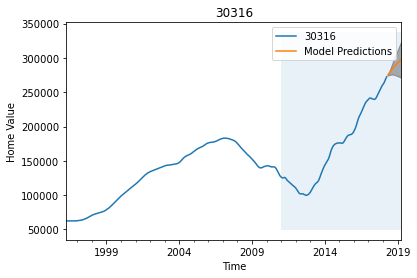

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.8722,0.023,38.197,0.000,0.827,0.917
ma.L1,0.7066,0.032,21.755,0.000,0.643,0.770
ma.S.L12,-0.8941,0.043,-20.822,0.000,-0.978,-0.810
sigma2,4.199e+05,2.42e+04,17.360,0.000,3.73e+05,4.67e+05


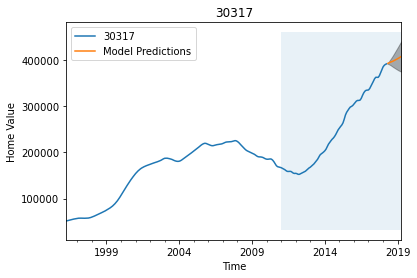

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.8611,0.027,31.413,0.000,0.807,0.915
ma.L1,0.3637,0.017,21.650,0.000,0.331,0.397
ar.S.L12,-0.4459,0.042,-10.678,0.000,-0.528,-0.364
ma.S.L12,-0.0530,0.031,-1.720,0.085,-0.113,0.007
sigma2,2.667e+05,1.37e+04,19.478,0.000,2.4e+05,2.93e+05


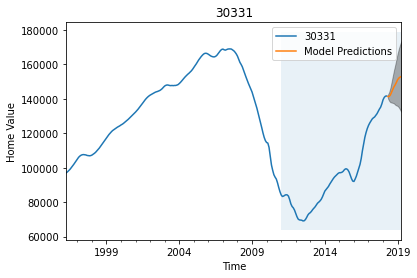

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.7642,0.035,21.875,0.000,0.696,0.833
ma.L1,0.5134,0.042,12.252,0.000,0.431,0.596
ma.S.L12,-0.2938,0.027,-10.724,0.000,-0.348,-0.240
sigma2,4.669e+06,2.84e+05,16.427,0.000,4.11e+06,5.23e+06


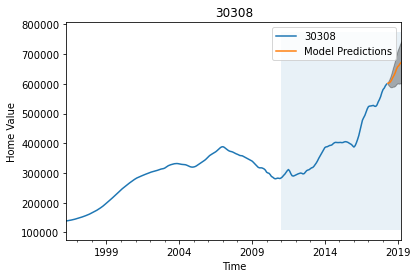

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.8652,0.024,36.310,0.000,0.819,0.912
ma.L1,0.6915,0.037,18.878,0.000,0.620,0.763
ma.S.L12,-0.3074,0.028,-10.914,0.000,-0.363,-0.252
sigma2,2.366e+06,1.52e+05,15.555,0.000,2.07e+06,2.66e+06


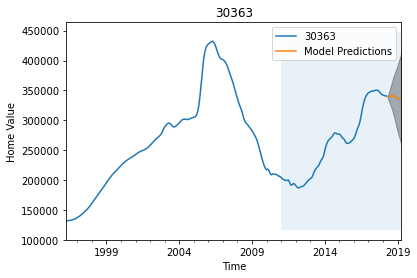

<Figure size 432x288 with 0 Axes>

In [73]:
# running best parameters on entire dataset for each zip code into model

forecast_table = pd.DataFrame() # make a df for our predictions
current_ = []
Zipcode = []
forecast_1Yr = []
forecast_2Yr =[]
conf_1Yr_L=[]
conf_1Yr_U=[]
conf_2Yr_L=[]
conf_2Yr_U=[]

figures = {}
confidences = {}
models = {}


for name in top_zips:
    temp_orders = param_dict[name]
    best_para = temp_orders.loc[temp_orders['AIC'].idxmin()]

    ARIMA_MODEL = sm.tsa.SARIMAX(atl_zips[name],
                                 order = best_para['pdq'],
                                 seasonal_order = best_para['pdqs'],
                                 enforce_stationarity = False,
                                 enforce_invertibility = False,
                                 )
    
    output = ARIMA_MODEL.fit()
#     print('SARIMA Model Result for {}'.format(name))
#     output.plot_diagnostics(figsize=(15, 3))
    display(output.summary().tables[1])
    models[name] = output
    output = models[name]        
    fig = plt.gcf()
    figures[name] = fig
        
    prediction = output.get_forecast(steps=12, 
                                     dynamic=False, full_results = True)
    pred_conf = prediction.conf_int()
    confidences[name] = pred_conf
    zip_forecasted = prediction.predicted_mean
    zip_truth = atl_zips[name]
    
    
    confidences[name] = pred_conf

    
    rmse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
    mse = ((zip_forecasted - zip_truth)**2).mean()
    
    Zipcode.append(name)
    RMSE_Value.append(rmse)
    MSE_Value.append(mse)
    
    ax = atl_zips[name].plot(label=name)



    prediction.predicted_mean.plot(label='Model Predictions', ax=ax)
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=0.3)

    
    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2011-01-01'), 
                     prediction.predicted_mean.index[-1], alpha=.1, zorder=-1)

    ax.set_ylabel('Home Value')
    ax.set_xlabel('Time')
    ax.set_title(name)
   
    plt.legend()
    plt.show()
    fig = plt.gcf()
    figures[name] = fig
    
    # 1 year predictions
    pred_1 = output.get_forecast(steps = 12)
    pred_conf_1 = pred_1.conf_int()
    forecast_1 = pred_1.predicted_mean.to_numpy()[-1]
    
    # 2 year predictions
    pred_2 = output.get_forecast(steps = 24)
    pred_conf_2 = pred_2.conf_int()
    forecast_2 = pred_2.predicted_mean.to_numpy()[-1]
    current_.append(atl_zips[name]['2018-04'][0])
    
    # grabbing the confidence level bounds for each zip code
    forecast_1Yr.append(forecast_1)
    conf_1Yr_L.append(pred_conf_1.iloc[:, 0][-1])
    conf_1Yr_U.append(pred_conf_1.iloc[:, 1][-1])
    forecast_2Yr.append(forecast_2)
    conf_2Yr_L.append(pred_conf_2.iloc[:, 0][-1])
    conf_2Yr_U.append(pred_conf_2.iloc[:, 1][-1])

# Step 6: Interpreting Results

Below we'll plot the resulting forecasts for our ZIP codes over the next two years in context to give a clear idea of our projections and related intervals of confidence.

In [74]:
# makes a dataset with future values and ROIs for all zip codes
forecast_table['Zipcode'] = Zipcode
forecast_table['Current Value'] = current_

# displays our home value forecasts across two years
forecast_table['2 Year Value'] = forecast_2Yr
forecast_table['2 Year Upper'] = conf_2Yr_U
forecast_table['2 Year Lower'] = conf_2Yr_L
forecast_table['1 Year Value'] = forecast_1Yr
forecast_table['1 Year Upper'] = conf_1Yr_U
forecast_table['1 Year Lower'] = conf_1Yr_L

# calculates the ROIs across two years
forecast_table['2Yr-ROI']=((forecast_table['2 Year Value'] 
                            - forecast_table['Current Value'])
                           /forecast_table['Current Value'])
forecast_table['2Yr-ROI-Upper']=(forecast_table['2 Year Upper'] 
                                 - forecast_table['Current Value']) /forecast_table['Current Value']
forecast_table['2Yr-ROI-Lower']=(forecast_table['2 Year Lower'] 
                                 - forecast_table['Current Value']) /forecast_table['Current Value']
forecast_table['1Yr-ROI']=((forecast_table['1 Year Value'] 
                            - forecast_table['Current Value'])
                           /forecast_table['Current Value'])
forecast_table['1Yr-ROI-Upper']=(forecast_table['1 Year Upper'] 
                                 - forecast_table['Current Value']) /forecast_table['Current Value']
forecast_table['1Yr-ROI-Lower']=(forecast_table['1 Year Lower'] 
                                 - forecast_table['Current Value']) /forecast_table['Current Value']


# 2 year ROI, upper, lower, 1 year ROI, upper, lower, 

Below, we have the resulting values from our forecast across each time period and the associated confidence intervals. You'll find exact value ranges and ROI estimates spanning two years out from our data.

In [75]:
# compare resulting ZIP code forecast, sort by associated ROI
forecast_table.sort_values('2Yr-ROI', ascending = False)

,Zipcode,Current Value,2 Year Value,2 Year Upper,2 Year Lower,1 Year Value,1 Year Upper,1 Year Lower,2Yr-ROI,2Yr-ROI-Upper,2Yr-ROI-Lower,1Yr-ROI,1Yr-ROI-Upper,1Yr-ROI-Lower
3,30308,599300.0,746391.641328,904803.976978,587979.305677,672466.752323,743522.994198,601410.510448,0.245439,0.509768,-0.018890,0.122087,0.240652,0.003522
0,30316,272500.0,317543.130670,373446.093634,261640.167706,297810.756115,324377.469648,271244.042582,0.165296,0.370444,-0.039853,0.092884,0.190376,-0.004609
2,30331,141600.0,163969.215507,210406.607526,117531.823488,152879.415135,173367.893339,132390.936931,0.157975,0.485922,-0.169973,0.079657,0.224350,-0.065036
1,30317,391600.0,428267.994558,493776.850493,362759.138623,407511.244532,440467.361338,374555.127725,0.093636,0.260921,-0.073649,0.040631,0.124789,-0.043526
4,30363,340300.0,333184.910971,519723.644991,146646.176951,335865.730704,411644.466115,260086.995293,-0.020908,0.527251,-0.569068,-0.013030,0.209652,-0.235713


## ROI Forecast

In [76]:
# isolate our ROI specific columns
forecast_table.drop(['1 Year Value', '2 Year Value', '1 Year Lower', 
                     '1 Year Upper', '2 Year Lower', '2 Year Upper'], axis=1, inplace=True)
forecast_table.sort_values('2Yr-ROI', ascending = False)

,Zipcode,Current Value,2Yr-ROI,2Yr-ROI-Upper,2Yr-ROI-Lower,1Yr-ROI,1Yr-ROI-Upper,1Yr-ROI-Lower
3,30308,599300.0,0.245439,0.509768,-0.018890,0.122087,0.240652,0.003522
0,30316,272500.0,0.165296,0.370444,-0.039853,0.092884,0.190376,-0.004609
2,30331,141600.0,0.157975,0.485922,-0.169973,0.079657,0.224350,-0.065036
1,30317,391600.0,0.093636,0.260921,-0.073649,0.040631,0.124789,-0.043526
4,30363,340300.0,-0.020908,0.527251,-0.569068,-0.013030,0.209652,-0.235713


# The Breakdown

In this notebook - we took the best ROI performers from the past and evaluated how they'll do in the future to help narrow our targets so we can future plan accordingly.

Here's how we estimate the strongest Atlanta ZIP codes will perform in the next two years:

1. `30308`: 24% return
2. `30316`: 16.5% return
3. `30331`: 15.7% return
4. `30317`: 9.3% return
5. `30363`: -2% return

Since we have fairly large confidence intervals for these ZIP codes and can't confidently say these will produce that return, I advise that we drill down even further into the top three ZIP codes and do the following:

**TECHNICAL**
1. Bring in our isolated data across ZIPS
2. Introduce further methods for stationarity
3. Tune our parameters according to our tests like ACF/PCF
4. Evaluate exactly which months were affected by the 08' crisis and remove them, while keeping data back to 96' which brings over a decade more of training data to improve our models
5. Bring in our holdout data for further evaluation betewen model iterations
6. Evaluate all of our Atlanta ZIPs versus the best past-performers to see how ROI and confidence levels compare

**NON-TECHNICAL**
Tie our research further to Hellbent’s Real Estate Development Goals by:
1. Diving deeper into Zillow’s metric for value determination through time, and ensure it matches the type of development and returns expected in context
2. Analyzing each ZIP code and creating a development project timeline and/or aligned metric to ensure we’re abreast of current development saturation - and how such past developments have affected housing values in Atlanta
3. Map ROI past a three year horizon in order to make increasingly actionable

We can use the same steps as shown here to evaluate different real-estate data given we have methods of assessing value and can therefore bring in comparable data to see how well our conclusions hold. We can even expand this to all or some of the other 14,000 ZIP codes represented to develop more targets and evaluate predictability among returns.